In [161]:
import pandas as pd
from nltk import FreqDist
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

In [140]:
df = pd.read_csv(r'2019politicostweeter.csv',parse_dates=['fecha'])

In [141]:
wt = RegexpTokenizer('[\w]+')
df['tweets'] =df['tweets'].apply(lambda x: x.lower())
df['tw'] = df['tweets'].apply(lambda x: wt.tokenize(x))
badwords=stopwords.words('spanish')
morebw = ['https','t','co','En','vivo','rt','sé']
for x in morebw:
    badwords.append(x)
df['tw'] = df['tw'].apply(lambda x: [word for word in x if word not in badwords])

In [142]:
def get_freq(df,twitter,column='twitter',nfreq=50):
    frequ = df.loc[df[column]==twitter,'tw'].tolist()
    frequ = [item for sublist in frequ for item in sublist]
    return FreqDist(frequ).most_common()[:nfreq]
    

# Frequency Macri and Fernandez 

In [147]:
MM=pd.DataFrame(get_freq(df,'mauriciomacri'),columns=['Term','Freq'])

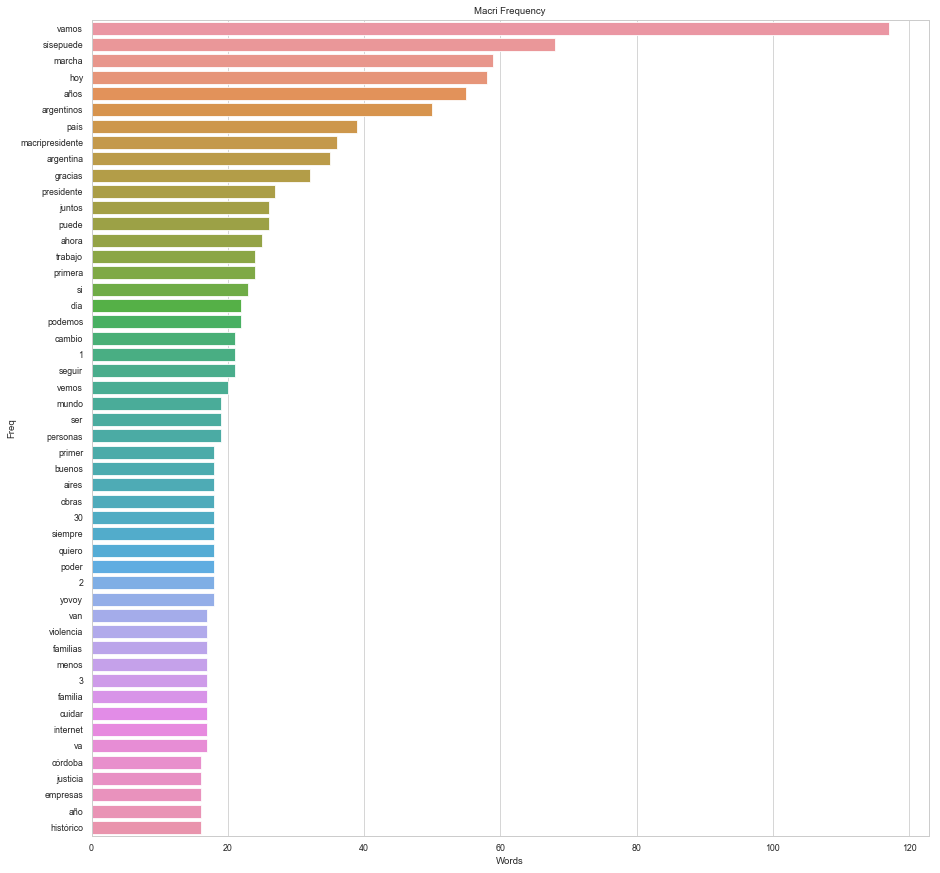

In [148]:
plt.figure(figsize=(15,15))
plt.title('Macri Frequency')
sns.barplot(x=MM['Freq'],y=MM['Term'])
plt.xlabel('Words')
plt.ylabel('Freq')
plt.show()


In [149]:
AF=pd.DataFrame(get_freq(df,'alferdez'),columns=['Term','Freq'])

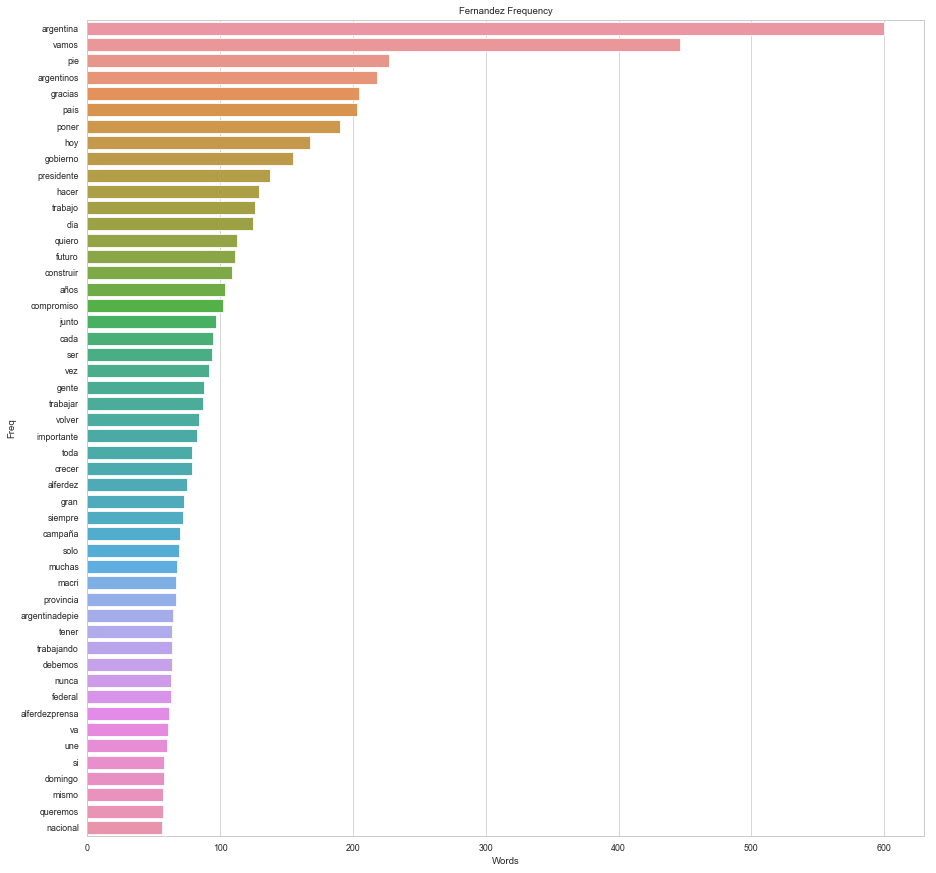

In [150]:
plt.figure(figsize=(15,15))
plt.title('Fernandez Frequency')
sns.barplot(x=AF['Freq'],y=AF['Term'])
plt.xlabel('Words')
plt.ylabel('Freq')
plt.show()

# Peronism vs Pro WordClouds

## Peronism

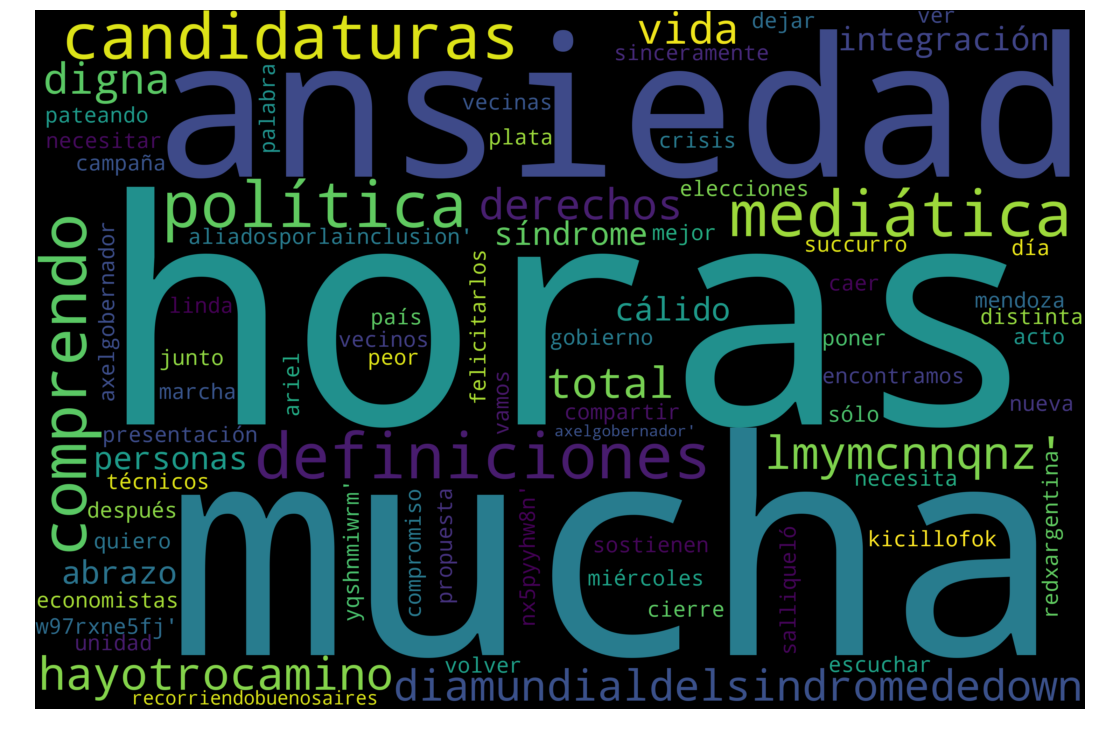

In [154]:
plt.figure(figsize=(15,10))
PERO = df.loc[df['corriente']=='peronista','tw'].apply(lambda x: ' '.join(x)).values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(PERO))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Pro

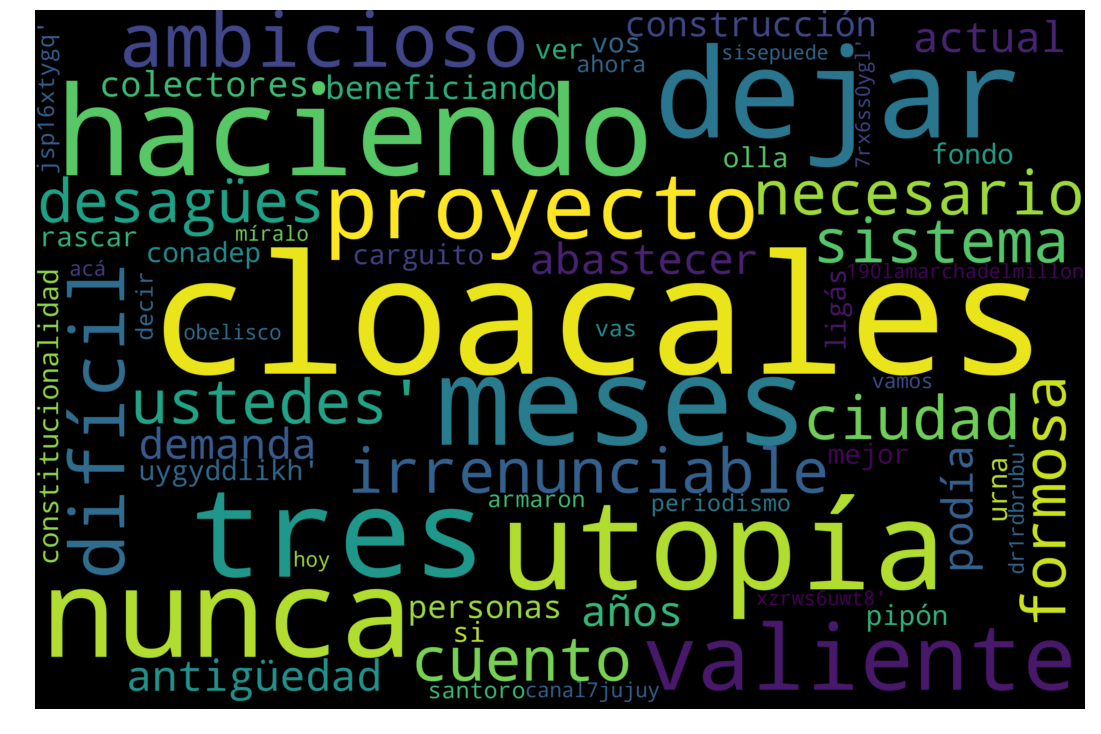

In [155]:
plt.figure(figsize=(15,10))
PERO = df.loc[df['corriente']=='pro','tw'].apply(lambda x: ' '.join(x)).values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(PERO))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [159]:
df.head()

,tweets,fecha,twitter,corriente,tw
0,sé que por estas horas hay mucha ansiedad polí...,2019-05-23 22:15:03,danielscioli,peronista,"[horas, mucha, ansiedad, política, mediática, ..."
1,#diamundialdelsindromededown\r\r\r\r\r\r\r\r\r...,2019-03-21 20:37:21,RLavagna,peronista,"[diamundialdelsindromededown, derechos, vida, ..."
2,"esto no es una utopía, es lo que estamos hacie...",2019-07-13 15:49:05,mariuvidal,pro,"[utopía, haciendo, tres, meses, dejar, nunca, ..."
3,el sistema de desagües cloacales de la ciudad ...,2019-08-21 11:41:01,frigeriorogelio,pro,"[sistema, desagües, cloacales, ciudad, formosa..."
4,mejor rascar la urna que el fondo de la olla p...,2019-09-15 01:37:09,FerIglesias,pro,"[mejor, rascar, urna, fondo, olla, ver, si, li..."


Vector,pipeline modelselection